# Logistic Regression

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML LAB/heart.csv")

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# data and label

data_label = data.output.values
data.drop(["output"], axis = 1, inplace = True)

In [ ]:
# normalization

data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data)).values

In [ ]:
# train and test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_normalized, data_label, test_size = 0.2, random_state = 42)

In [ ]:
# transpose and shape

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (13, 242)
x_test:  (13, 61)
y_train:  (242,)
y_test:  (61,)


In [ ]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [ ]:
def sigmoid(z):
    
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1] # x_train.shape[1] is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T))) / x_train.shape[1] # x_train.shape[1] is for scaling
    derivative_bias = np.sum(y_head-y_train) / x_train.shape[1] # x_train.shape[1] is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

In [ ]:
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iteration times
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation = 'vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients, cost_list

In [ ]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test) + b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),        
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    return Y_prediction

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    # initialize
    dimension = x_train.shape[0] 
    w,b = initialize_weights_and_bias(dimension)
    # don't change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    
    # print test errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.692516
Cost after iteration 10: 0.522652
Cost after iteration 20: 0.464812
Cost after iteration 30: 0.436631
Cost after iteration 40: 0.419664
Cost after iteration 50: 0.408136
Cost after iteration 60: 0.399711
Cost after iteration 70: 0.393253
Cost after iteration 80: 0.388134
Cost after iteration 90: 0.383976
Cost after iteration 100: 0.380530
Cost after iteration 110: 0.377629
Cost after iteration 120: 0.375155
Cost after iteration 130: 0.373021
Cost after iteration 140: 0.371161
Cost after iteration 150: 0.369526
Cost after iteration 160: 0.368078
Cost after iteration 170: 0.366787
Cost after iteration 180: 0.365628
Cost after iteration 190: 0.364583
Cost after iteration 200: 0.363634
Cost after iteration 210: 0.362770
Cost after iteration 220: 0.361980
Cost after iteration 230: 0.361254
Cost after iteration 240: 0.360585
Cost after iteration 250: 0.359967
Cost after iteration 260: 0.359393
Cost after iteration 270: 0.358860
Cost after iteration 280: 0.358

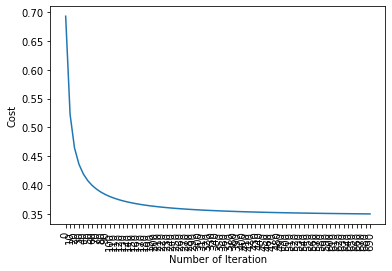

test accuracy: 85.24590163934427 %


In [ ]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 1, num_iterations = 700)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
print("test accuracy: {} %".format((lr.score(x_test.T,y_test.T)) * 100))

test accuracy: 85.24590163934425 %
